# Image Processing Basics

This notebook is taken from "Getting Started/Image Processing Basics" by Akshay Nayak (https://www.kaggle.com/akshayt19nayak/getting-started-image-processing-basics), using data from 2018 Data Science Bowl (see Kaggle page).


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

stage1_sample_submission.csv
stage1_test
stage1_train
stage1_train_labels.csv



In [2]:
# Importing the other necessary libraries
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the image

In [3]:
# Importing OpenCV - the computer vision library
import cv2

In [11]:
# Glob the training data and load a single image path
training_paths = pathlib.Path('../input/stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
# print(len(training_sorted))
im_path = training_sorted[45]

Original Image Shape (520, 696, 3)


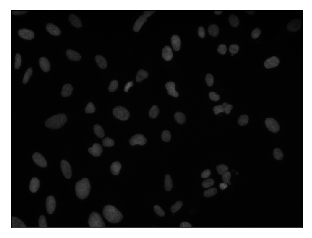

In [12]:
# Reading the image 
bgrimg = cv2.imread(str(im_path))
plt.imshow(bgrimg)
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('Original Image Shape',bgrimg.shape)

In [16]:
# To see the structure of the image let's display one row of the image matrix
print('The first row of the image matrix contains',len(bgrimg[0]),'pixels')
print(bgrimg[0])

The first row of the image matrix contains 696 pixels
[[3 3 3]
 [3 3 3]
 [7 7 7]
 ...
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [17]:
# Transfrom the colorspace from BGR to grayscale so as to make things simpler
grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)

New Image Shape (520, 696)


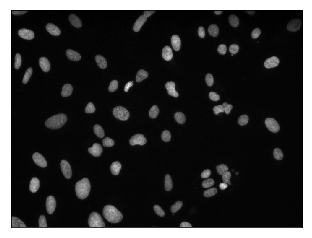

In [19]:
# Plot the image
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

In [22]:
# This displays one entire row of the image matrix with the corresponding luminance or intensities for each pixel
print('The first row of the image matrix contains',len(grayimg[1]),'pixels')
print(grayimg[1])

The first row of the image matrix contains 696 pixels
[ 3  6 13 19 20 22 26 27 27 25 24 25 25 26 30 30 31 32 29 28 27 31 32 31
 30 30 32 32 31 28 30 31 33 29 27 25 25 24 22 22 20 16 10  6  4  2  2  2
  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  2  2  1  2  2  2  1  1  2  2  2  2  1  1  1  1  2  1  1  1  1
  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1
  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1 

## Removing the background

Text(0.5,1,'Distribution of intensity values (Zoomed In)')

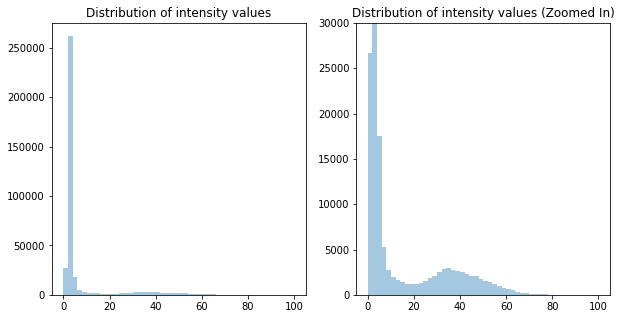

In [23]:
# Let's look at the distribution of the intensity values of all the pixels
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(),kde=False)# Flattens the matrix and puts the intensity values of all the pixels in one single row vector
plt.title('Distribution of intensity values')

# Zoom in on the distribution and see if there is more than one prominent peak 
plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(),kde=False) 
plt.ylim(0,30000) 
plt.title('Distribution of intensity values (Zoomed In)')

In [24]:
# Otsu's threshold method
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal separation value is 21


In [25]:
mask=np.where(grayimg>thresh_val,1,0)

Text(0.5,1,'Mask')

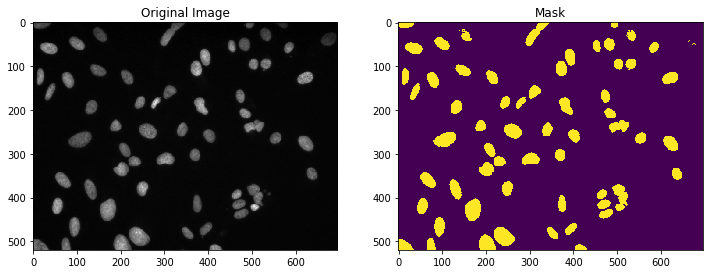

In [26]:
# Comparing original image and mask side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask')

Text(0.5,1,'Mask with Otsu Separation')

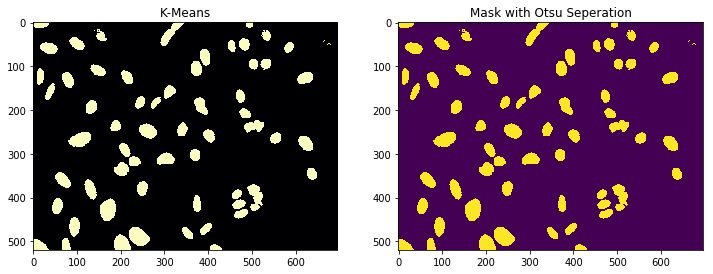

In [29]:
# Let's see if K-Means does a good job on this data 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2) #2 as we're still trying to separate the lighter coloured nuclei from the darker coloured background 
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(kmeans.labels_.reshape(520,696),cmap='magma')
plt.title('K-Means')

plt.subplot(1,2,2)
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask with Otsu Seperation')

In [30]:
# Check if there's any difference
sum((kmeans.labels_.reshape(520,696)==mask).flatten())/(mask.shape[0]*mask.shape[1])

1.0

## Object identification

In [31]:
from scipy import ndimage

In [32]:
# Example
# Checking ndimage command at a matrix level
matrix = np.array([[0,0,1,1,1,1],
                  [0,0,0,0,1,1],
                  [1,1,0,1,1,1],
                  [1,1,0,1,1,1]])
matrix

array([[0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1]])

In [33]:
# Applying the ndimage.label function
ndimage.label(matrix)

(array([[0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1],
        [2, 2, 0, 1, 1, 1],
        [2, 2, 0, 1, 1, 1]], dtype=int32), 2)

In [34]:
labels,nlabels=ndimage.label(mask)
print('There are',nlabels,'distinct nuclei in the mask.')

There are 70 distinct nuclei in the mask.


In [35]:
# Since we need to create a separate mask for every nucleus, let's store the masks in an iterable like a list 
label_array=[]
# ndimage.label encodes every object starting from number 1
for i in range(1, nlabels+1):
    label_mask = np.where(labels==i,1,0)
    label_array.append(label_mask)
#To see one such mask
label_array[68]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

## Run Length Encoding